#Prerequisites

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seb

from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import metrics

#PROBLEM STATEMENT

##Specifying the question

Can hypotheyroid cases be predicted using symptoms and tests? Data from a clinical camp conducted by Nairobi Hospital shall be used to try answer this question within the study.

##Defining the metric of success

The study shall be deemed successful with a model that predicts the internal data with an accuracy of 80% and above

##Recording the experimental design

The following shall be used to complete the aforementioned objectives that have been set out as described above:
1. Simply reading parts of the data
2. Exploratory data analysis 
3. Decision Trees
4. Support Vector Machines


##Recording the experimental design

The data acquired will later be verified at the source which is Nairobi Hospital

#READING AND EXPLORING THE DATA

In [ ]:
da = pd.read_csv('/content/hypothyroid.csv')

In [ ]:
da.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,?
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.70,y,1.30,y,54,y,0.86,y,63,n,?
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.90,y,34,y,1.05,y,32,n,?
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,?,y,39,y,1.21,y,32,n,?
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,?,y,7.60,y,1.02,y,7.50,n,?


In [ ]:
da.shape

(3163, 26)

In [ ]:
da.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [ ]:
da['TBG'].unique()

array(['?', '28', '34', '0', '19', '30', '25', '48', '39', '31', '16',
       '21', '37', '40', '27', '3.10', '38', '108', '20', '36', '17',
       '23', '35', '32', '63', '9.30', '15', '26', '33', '41', '110',
       '22', '43', '53', '80', '47', '29', '13', '24', '18', '45', '86',
       '50', '8.40', '52', '11', '12', '14', '65', '7.30', '8.50', '69',
       '122'], dtype=object)

###Description

In [ ]:
desc = pd.DataFrame(columns = ['no. of unique'], index = da.columns)

In [ ]:
for t , y in desc.iterrows():
  desc.loc[t,'no. of unique'] = len(da[t].unique())

In [ ]:
desc

,no. of unique
status,2
age,93
sex,3
on_thyroxine,2
query_on_thyroxine,2
on_antithyroid_medication,2
thyroid_surgery,2
query_hypothyroid,2
query_hyperthyroid,2
pregnant,2


In [ ]:
desc['unique'] = ''
for t , y in desc.iterrows():
  if y['no. of unique'] < 5:
    desc.loc[t,'unique'] = str(da[t].unique())

In [ ]:
desc['max'] = ''
desc['min'] = '' 
for t , y in desc.iterrows():
  if y['no. of unique'] > 5:
    desc.loc[t,'max'] = da[t].max()
    desc.loc[t,'min'] = da[t].min()

In [ ]:
desc

,no. of unique,unique,max,min
status,2,['hypothyroid' 'negative'],,
age,93,,?,1
sex,3,['M' 'F' '?'],,
on_thyroxine,2,['f' 't'],,
query_on_thyroxine,2,['f' 't'],,
on_antithyroid_medication,2,['f' 't'],,
thyroid_surgery,2,['f' 't'],,
query_hypothyroid,2,['f' 't'],,
query_hyperthyroid,2,['f' 't'],,
pregnant,2,['f' 't'],,


#APPROPRIATENESS OF THE DATA

The data seems appropriate with most seemingly able to be collected by simple observation

#DATA PROCESSING


In [ ]:
qm = da.columns
qwith = []
for w in qm:
  if '?' in da[w].unique():
    qwith.append(w)

In [ ]:
for w in qwith:
  if w == qwith[0]:
    print (w + '\t' + str(len(da[da[w] == '?'].index)))
  else:
    print (w + '\t' + str(len(da[da[w] == '?'].index)))

age	446
sex	73
TSH	468
T3	695
TT4	249
T4U	248
FTI	247
TBG	2903


In [ ]:
da.drop(columns= ['TBG'], inplace = True)
qwith.remove('TBG')

In [ ]:
for w in qwith:
  if w == qwith[0]:
    e = (da[da[w] == '?'].index)
    print (w + '\t' + str(len(da[da[w] == '?'].index)))
  else:
    print (w + '\t' + str(len(da[da[w] == '?'].index)))
    e = e.append(da[da[w] == '?'].index)

age	446
sex	73
TSH	468
T3	695
TT4	249
T4U	248
FTI	247


In [ ]:
len(e)

2426

In [ ]:
da.shape

(3163, 25)

In [ ]:
da.drop(index = e , inplace = True)

In [ ]:
'?' in da

False

###Description

In [ ]:
desc1 = pd.DataFrame(columns = ['no. of unique'], index = da.columns)

In [ ]:
for t , y in desc1.iterrows():
  desc1.loc[t,'no. of unique'] = len(da[t].unique())

In [ ]:
desc1

,no. of unique
status,2
age,91
sex,2
on_thyroxine,2
query_on_thyroxine,2
on_antithyroid_medication,2
thyroid_surgery,2
query_hypothyroid,2
query_hyperthyroid,2
pregnant,2


In [ ]:
desc1['unique'] = ''
for t , y in desc1.iterrows():
  if y['no. of unique'] < 5:
    desc1.loc[t,'unique'] = str(da[t].unique())

In [ ]:
desc1['max'] = ''
desc1['min'] = '' 
for t , y in desc1.iterrows():
  if y['no. of unique'] > 5:
#    da[t] = pd.to_numeric(da[t])
    desc1.loc[t,'max'] = da[t].max()
    desc1.loc[t,'min'] = da[t].min()

In [ ]:
desc1

,no. of unique,unique,max,min
status,2,['hypothyroid' 'negative'],,
age,91,,98,1
sex,2,['M' 'F'],,
on_thyroxine,2,['f' 't'],,
query_on_thyroxine,2,['f' 't'],,
on_antithyroid_medication,2,['f' 't'],,
thyroid_surgery,2,['f' 't'],,
query_hypothyroid,2,['f' 't'],,
query_hyperthyroid,2,['f' 't'],,
pregnant,2,['f' 't'],,


In [ ]:
da.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.70,y,1.30,y,54,y,0.86,y,63,n
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.90,y,34,y,1.05,y,32,n
10,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n
11,hypothyroid,75,F,f,f,f,f,f,f,f,f,f,f,f,y,36,y,1.10,y,38,y,0.92,y,41,n


In [ ]:
da.replace({'f' : 0 , 't' : 1} , inplace = True)
da.replace({'M' : 0 , 'F' : 1} , inplace = True)
da.replace({'n' : 0 , 'y' : 1} , inplace = True)
da.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72,0,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.60,1,15,1,1.48,1,10,0
1,hypothyroid,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.70,1,19,1,1.13,1,17,0
2,hypothyroid,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.20,1,4,1,1,1,0,0
3,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.40,1,6,1,1.04,1,6,0
4,hypothyroid,77,0,0,0,0,0,0,0,0,0,0,0,0,1,7.30,1,1.20,1,57,1,1.28,1,44,0
5,hypothyroid,85,1,0,0,0,0,1,0,0,0,0,0,0,1,138,1,1.10,1,27,1,1.19,1,23,0
6,hypothyroid,64,1,0,0,0,1,0,0,0,0,0,0,0,1,7.70,1,1.30,1,54,1,0.86,1,63,0
7,hypothyroid,72,1,0,0,0,0,0,0,0,0,0,0,0,1,21,1,1.90,1,34,1,1.05,1,32,0
10,hypothyroid,69,1,0,0,0,0,0,0,0,0,0,0,0,1,21,1,0.80,1,53,1,0.86,1,61,0
11,hypothyroid,75,1,0,0,0,0,0,0,0,0,0,0,0,1,36,1,1.10,1,38,1,0.92,1,41,0


In [ ]:
da.drop(columns=['TSH_measured','T3_measured'  , 'TT4_measured', 'T4U_measured' , 'FTI_measured'] , inplace = True)

In [ ]:
da.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,TBG_measured
0,hypothyroid,72,0,0,0,0,0,0,0,0,0,0,0,0,30,0.60,15,1.48,10,0
1,hypothyroid,15,1,1,0,0,0,0,0,0,0,0,0,0,145,1.70,19,1.13,17,0
2,hypothyroid,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0.20,4,1,0,0
3,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,430,0.40,6,1.04,6,0
4,hypothyroid,77,0,0,0,0,0,0,0,0,0,0,0,0,7.30,1.20,57,1.28,44,0
5,hypothyroid,85,1,0,0,0,0,1,0,0,0,0,0,0,138,1.10,27,1.19,23,0
6,hypothyroid,64,1,0,0,0,1,0,0,0,0,0,0,0,7.70,1.30,54,0.86,63,0
7,hypothyroid,72,1,0,0,0,0,0,0,0,0,0,0,0,21,1.90,34,1.05,32,0
10,hypothyroid,69,1,0,0,0,0,0,0,0,0,0,0,0,21,0.80,53,0.86,61,0
11,hypothyroid,75,1,0,0,0,0,0,0,0,0,0,0,0,36,1.10,38,0.92,41,0


#EXPLORATORY DATA ANALYSIS


In [ ]:
va = da.copy()

In [ ]:
usecol = va.columns

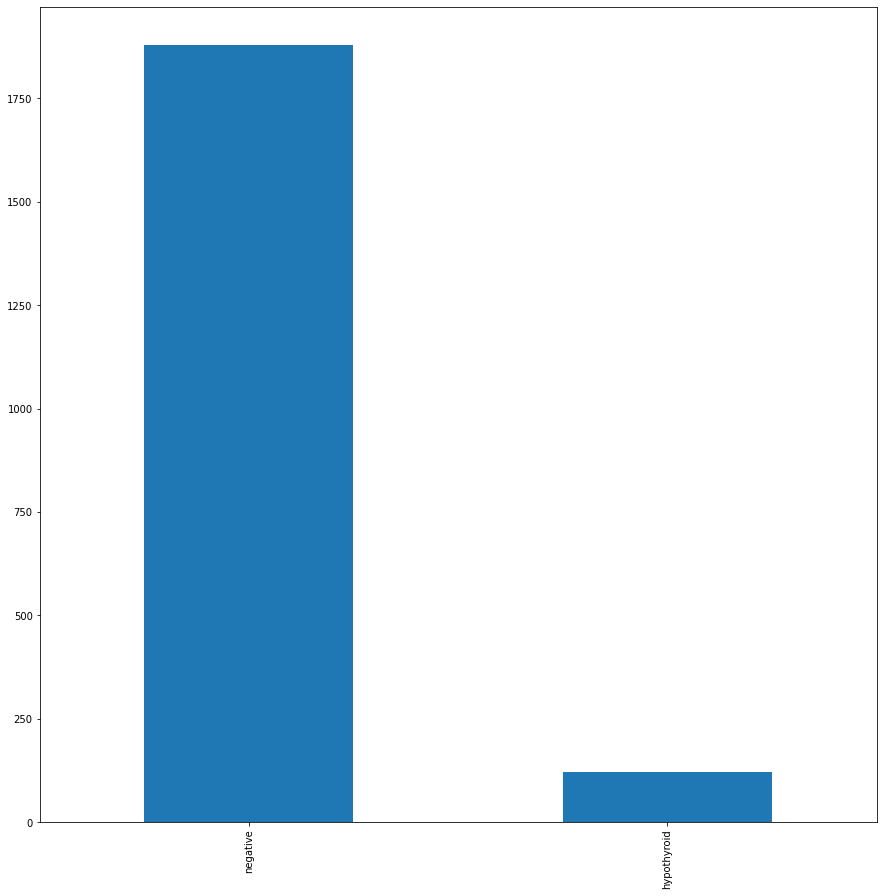

In [ ]:
plt.figure (figsize=(15,15))
va['status'].value_counts().plot(kind='bar')

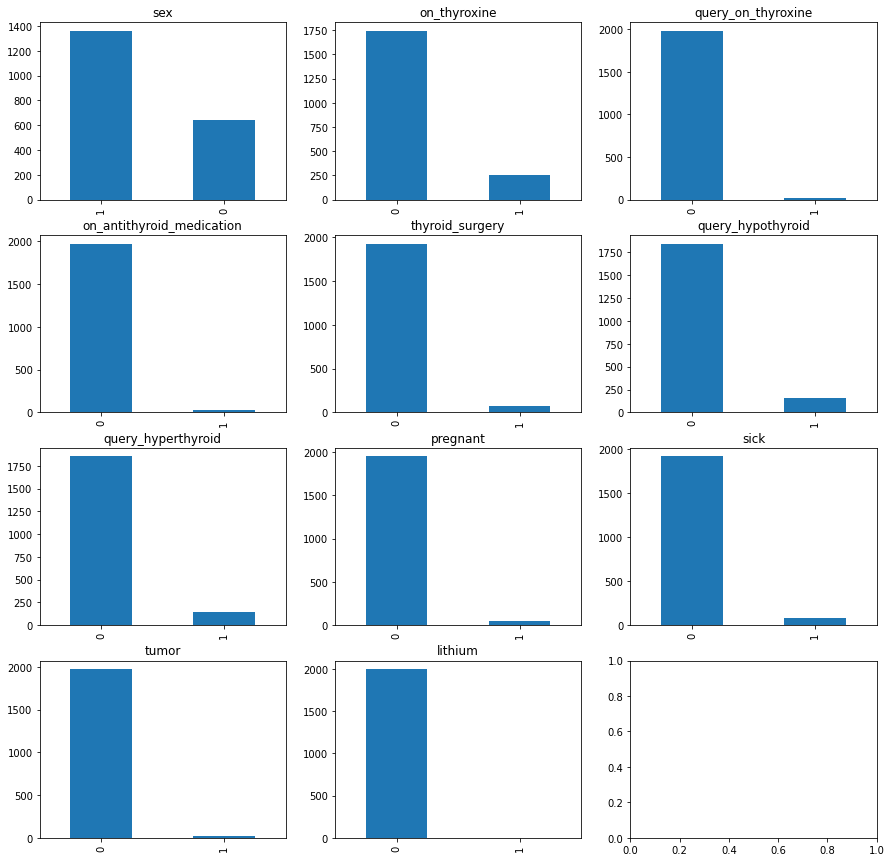

In [ ]:
g = 1

f , a = plt.subplots(nrows = 4 , ncols = 3, figsize = (15,15) )
for i in usecol[2:13]:
    plt.subplot(4,3,g)
    va[i].value_counts().plot(kind='bar')
    plt.title(i)
    g += 1


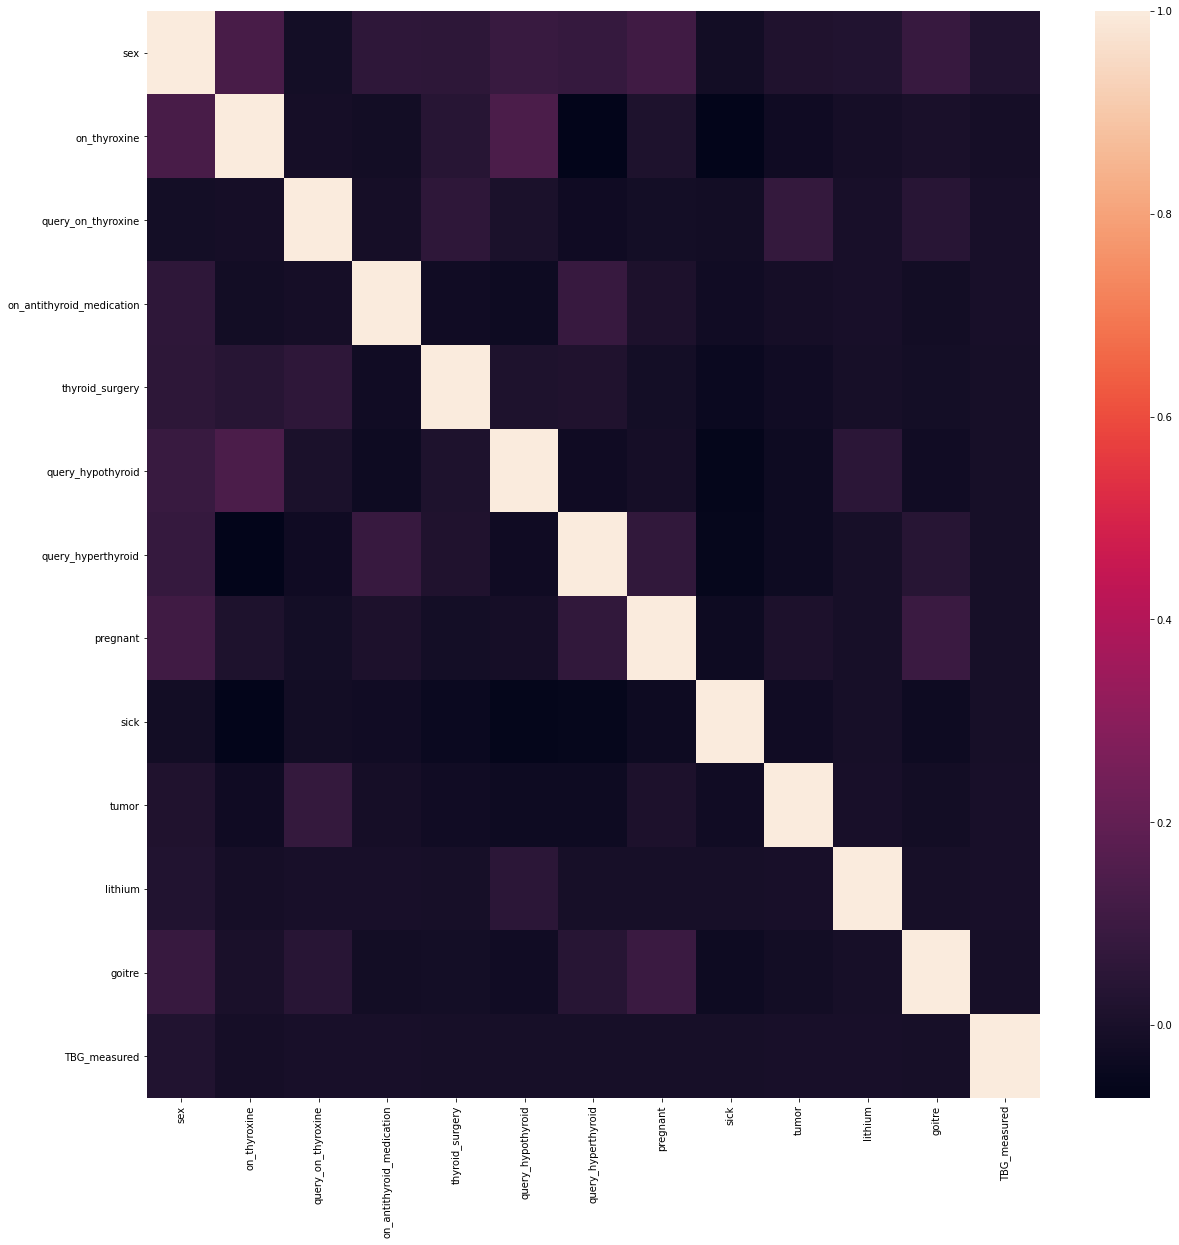

In [ ]:
plt.figure(figsize=(20,20))
seb.heatmap(va.corr())

In [ ]:
va.corr()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TBG_measured
sex,1.000000,0.130928,-0.013576,0.061573,0.057584,0.088285,0.078853,0.109721,-0.020555,0.019182,0.021679,0.086347,0.021679
on_thyroxine,0.130928,1.000000,-0.010102,-0.018882,0.038433,0.137478,-0.071979,0.015337,-0.071671,-0.029635,-0.012122,0.002013,-0.012122
query_on_thyroxine,-0.013576,-0.010102,1.000000,-0.012051,0.059088,0.007262,-0.028693,-0.016495,-0.021299,0.076713,-0.003259,0.044085,-0.003259
on_antithyroid_medication,0.061573,-0.018882,-0.012051,1.000000,-0.022606,-0.033669,0.084746,0.009019,-0.024188,-0.013161,-0.003701,-0.019301,-0.003701
thyroid_surgery,0.057584,0.038433,0.059088,-0.022606,1.000000,0.015066,0.018856,-0.013753,-0.039957,-0.021742,-0.006114,-0.015173,-0.006114
query_hypothyroid,0.088285,0.137478,0.007262,-0.033669,0.015066,1.000000,-0.029226,-0.009940,-0.059511,-0.032382,0.050411,-0.024062,-0.009106
query_hyperthyroid,0.078853,-0.071979,-0.028693,0.084746,0.018856,-0.029226,1.000000,0.066904,-0.057594,-0.031339,-0.008813,0.038345,-0.008813
pregnant,0.109721,0.015337,-0.016495,0.009019,-0.013753,-0.009940,0.066904,1.000000,-0.033109,0.010809,-0.005066,0.093216,-0.005066
sick,-0.020555,-0.071671,-0.021299,-0.024188,-0.039957,-0.059511,-0.057594,-0.033109,1.000000,-0.023263,-0.006542,-0.034114,-0.006542
tumor,0.019182,-0.029635,0.076713,-0.013161,-0.021742,-0.032382,-0.031339,0.010809,-0.023263,1.000000,-0.003560,-0.018563,-0.003560


In [ ]:
usecol

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG_measured'],
      dtype='object')

In [ ]:
usecol[-6:-1]

Index(['TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

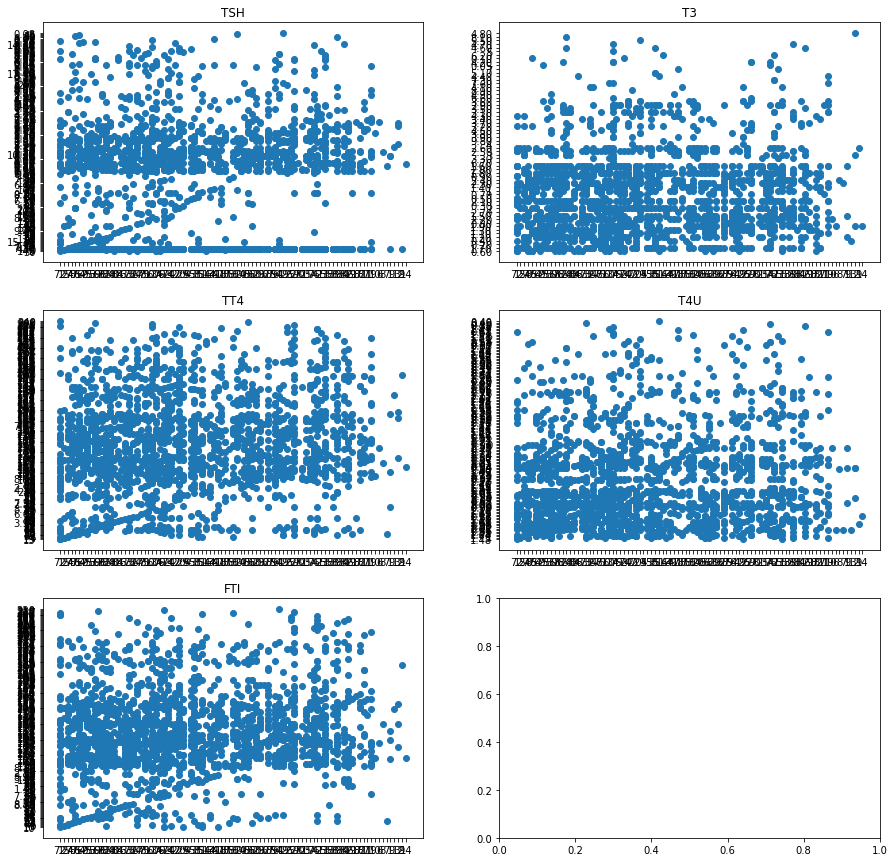

In [ ]:
f , a = plt.subplots(nrows = 3 , ncols = 2, figsize = (15,15) )
g= 1
for i in usecol[-6:-1]:
    plt.subplot(3,2,g)
    plt.scatter(va['age'],va[i])
    plt.title(i)
    g += 1


#IMPLEMENTING THE MODEL

In [ ]:
tomod = va.copy()

##DECISION TREES

In [ ]:
tomod['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

In [ ]:
tomod = pd.merge(tomod , pd.get_dummies(tomod['status']) , left_index=True , right_index=True)
tomod.drop(columns = ['negative' , 'status'], inplace=True)

In [ ]:
tomod['TBG_measured'].unique()

array([0, 1])

In [ ]:
tomod.replace()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,TBG_measured,hypothyroid
0,72,0,0,0,0,0,0,0,0,0,0,0,0,30,0.60,15,1.48,10,0,1
1,15,1,1,0,0,0,0,0,0,0,0,0,0,145,1.70,19,1.13,17,0,1
2,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0.20,4,1,0,0,1
3,24,1,0,0,0,0,0,0,0,0,0,0,0,430,0.40,6,1.04,6,0,1
4,77,0,0,0,0,0,0,0,0,0,0,0,0,7.30,1.20,57,1.28,44,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58,1,0,0,0,0,0,0,0,0,0,0,0,5.80,1.70,86,0.91,95,0,0
3159,29,1,0,0,0,0,0,0,0,0,0,0,0,0.80,1.80,99,1.01,98,0,0
3160,77,0,0,0,0,0,0,0,0,0,0,0,0,1.20,0.60,71,0.68,104,0,0
3161,74,1,0,0,0,0,0,0,0,0,0,0,0,1.30,0.10,65,0.48,137,0,0


In [ ]:
tomod

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,TBG_measured,hypothyroid
0,72,0,0,0,0,0,0,0,0,0,0,0,0,30,0.60,15,1.48,10,0,1
1,15,1,1,0,0,0,0,0,0,0,0,0,0,145,1.70,19,1.13,17,0,1
2,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0.20,4,1,0,0,1
3,24,1,0,0,0,0,0,0,0,0,0,0,0,430,0.40,6,1.04,6,0,1
4,77,0,0,0,0,0,0,0,0,0,0,0,0,7.30,1.20,57,1.28,44,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58,1,0,0,0,0,0,0,0,0,0,0,0,5.80,1.70,86,0.91,95,0,0
3159,29,1,0,0,0,0,0,0,0,0,0,0,0,0.80,1.80,99,1.01,98,0,0
3160,77,0,0,0,0,0,0,0,0,0,0,0,0,1.20,0.60,71,0.68,104,0,0
3161,74,1,0,0,0,0,0,0,0,0,0,0,0,1.30,0.10,65,0.48,137,0,0


In [ ]:
x = tomod.drop(columns= ['hypothyroid']).values
y = tomod['hypothyroid'].values
y = y.reshape(-1,1)

In [ ]:
y.dtype

dtype('uint8')

In [ ]:
tts = train_test_split

In [ ]:
xtr ,xte = tts (x, test_size = 0.2 , random_state= 0)
ytr ,yte = tts (y, test_size = 0.2 , random_state= 0)

###RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
ourforest = forest.fit(xtr, ytr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
pred = ourforest.predict(xte)

In [ ]:
len(yte)

400

In [ ]:
len(pred)

400

In [ ]:
comparison = pd.DataFrame({'Actual': yte.flatten(), 'Predicted': pred.flatten()})
comparison

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
395,0,0
396,0,0
397,0,0
398,0,0


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yte, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yte, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yte, pred)))

Mean Absolute Error: 3.1925
Mean Squared Error: 0.0175
Root Mean Squared Error: 0.13228756555322954


In [ ]:
accuracy_score(yte, pred) *100

98.25

In [ ]:
test_features = tomod.columns.to_list()
test_features.remove('hypothyroid')

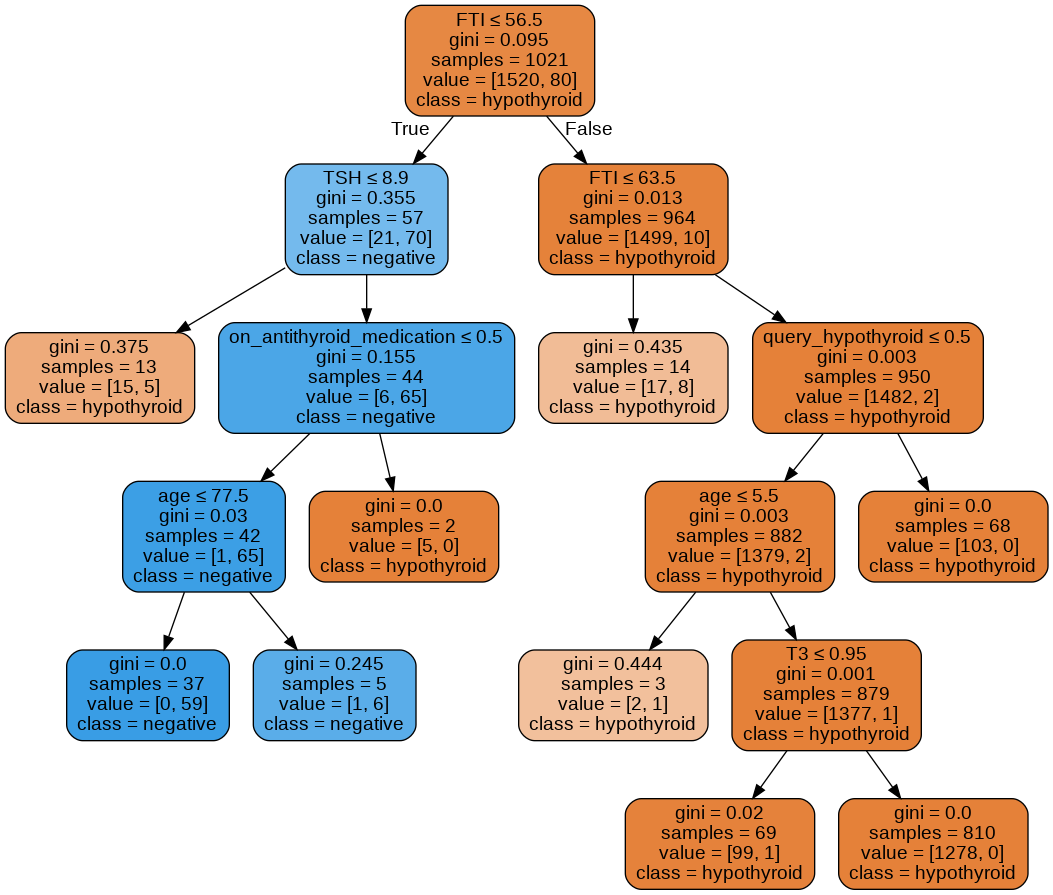

In [ ]:
#Visualizing the Random forest

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = ourforest.estimators_[50]


export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['hypothyroid', 'negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_forest.png')
Image(graph.create_png())

In [ ]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.07), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH', 0.11), ('T3', 0.0), ('TT4', 0.0), ('T4U', 0.0), ('FTI', 0.82), ('TBG_measured', 0.0)]

Variable: FTI                  Importance: 0.82
Variable: TSH                  Importance: 0.11
Variable: on_antithyroid_medication Importance: 0.07
Variable: age                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.

###ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#creating an adaboost classifier object
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=100, random_state=42)

#Train and predict
ada_boost = ada_boost.fit(xtr ,ytr)
adapred = ada_boost.predict(xte)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
comparison_frame = pd.DataFrame({'Actual': yte.flatten(), 'Predicted': adapred.flatten()})
comparison_frame

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
395,0,0
396,0,0
397,0,0
398,0,0


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yte, adapred))  
print('Mean Squared Error:', metrics.mean_squared_error(yte, adapred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yte, adapred)))

Mean Absolute Error: 0.645
Mean Squared Error: 0.01
Root Mean Squared Error: 0.1


In [ ]:
print("Accuracy:",metrics.accuracy_score(yte, adapred))

Accuracy: 0.99


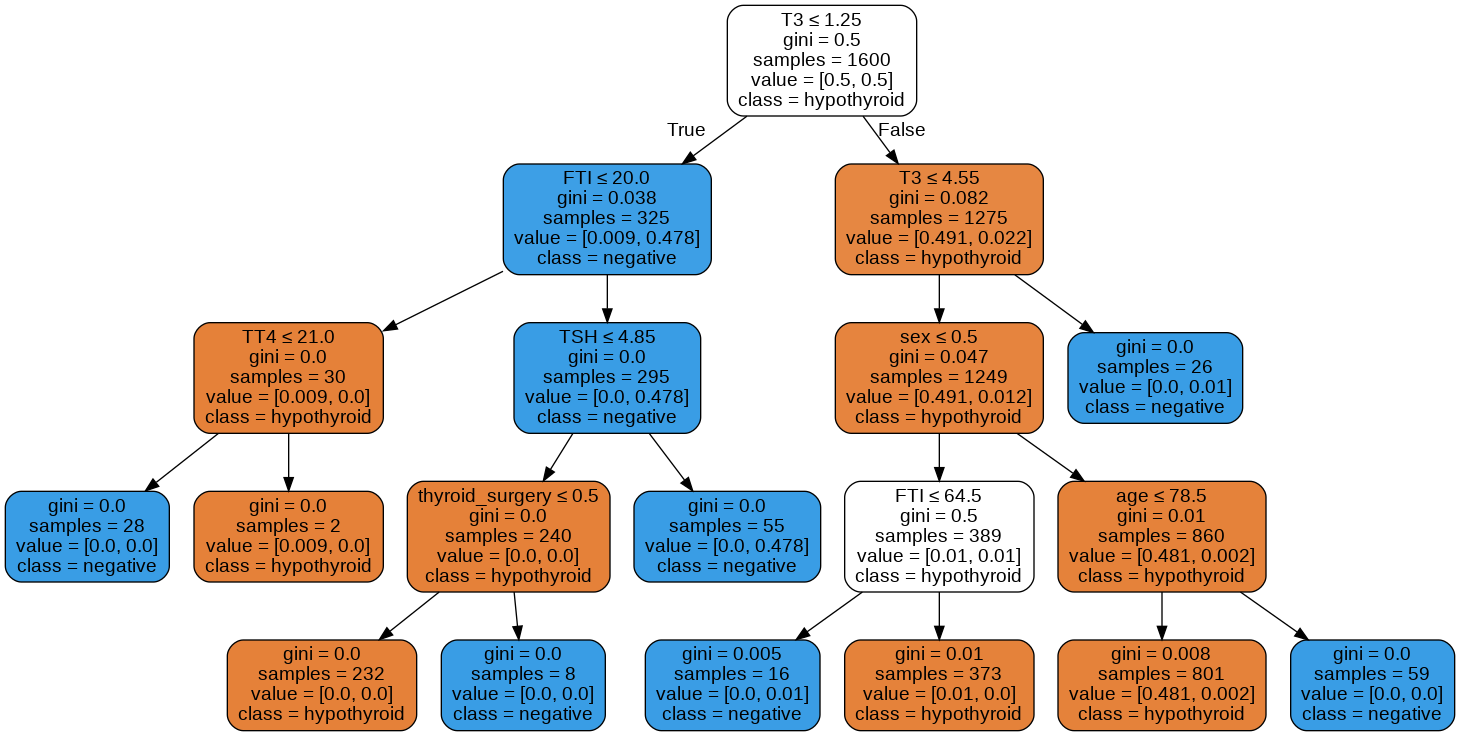

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = ada_boost.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['hypothyroid', 'negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_adaboost.png')
Image(graph.create_png())

###GRADIENT BOOST

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbr = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4,random_state=42)
gbr = gbr.fit(xtr, ytr)
gbrpred = gbr.predict(xte)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
comparison_frame = pd.DataFrame({'Actual': yte.flatten(), 'Predicted': gbrpred.flatten()})
comparison_frame

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
395,0,0
396,0,0
397,0,0
398,0,0


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yte, gbrpred))  
print('Mean Squared Error:', metrics.mean_squared_error(yte, gbrpred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yte, gbrpred)))

Mean Absolute Error: 0.6475
Mean Squared Error: 0.0125
Root Mean Squared Error: 0.11180339887498948


In [ ]:
print("Accuracy:",metrics.accuracy_score(yte, gbrpred))

Accuracy: 0.9875


In [ ]:
test_features = tomod.columns.to_list()
test_features.remove('hypothyroid')

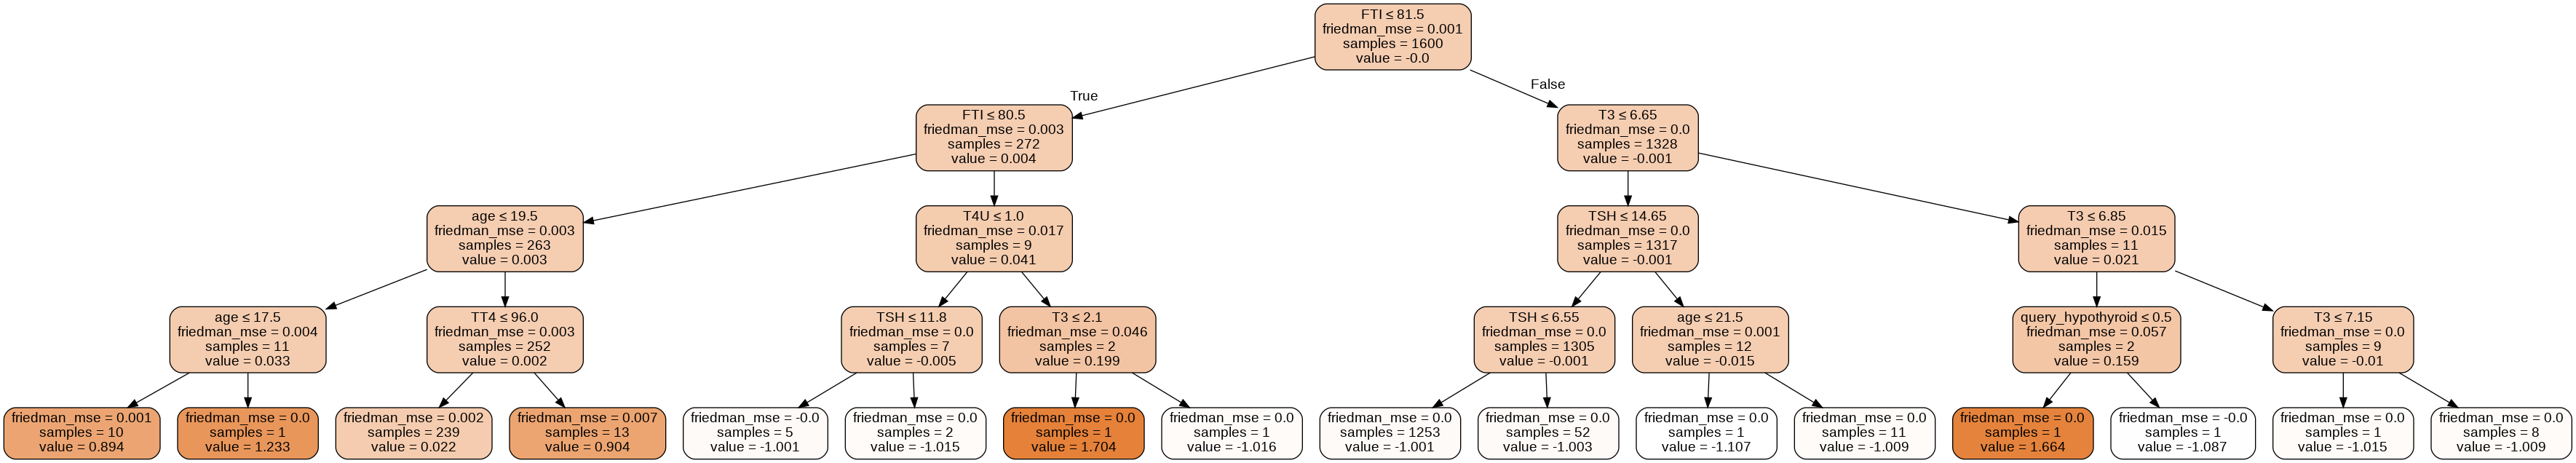

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = gbr.estimators_[50,0]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['hypothyroid', 'negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_gbr.png')
Image(graph.create_png())

In [ ]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.11), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.29), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH', 0.01), ('T3', 0.36), ('TT4', 0.02), ('T4U', 0.16), ('FTI', 0.05), ('TBG_measured', 0.0)]

Variable: T3                   Importance: 0.36
Variable: query_hypothyroid    Importance: 0.29
Variable: T4U                  Importance: 0.16
Variable: age                  Importance: 0.11
Variable: FTI                  Importance: 0.05
Variable: TT4                  Importance: 0.02
Variable: TSH                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hyperthyroid   Importan

##SUPPORT VECTOR MACHINES

In [ ]:
from sklearn.svm import SVC,LinearSVC

In [ ]:
x = tomod[usecol[-6:-1]]
y = tomod['hypothyroid']

In [ ]:
y = y.astype('category')
y = y.cat.codes

In [ ]:
xtr ,xte = tts (x, test_size = 0.2 , random_state= 0)
ytr ,yte = tts (y, test_size = 0.2 , random_state= 0)

###Linear

In [ ]:
linsvc = SVC(kernel = 'linear')

# Train the model using the training set
linsvc.fit(xtr,ytr)

# Predict the response for the test set
lsvcpred = linsvc.predict(xte)

# Checking the accurancy of the model
model_accuracy = accuracy_score(lsvcpred,yte)
model_accuracy

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.985

###Poly

In [ ]:
for e in range (0, 10):
  poly_classifier = SVC(kernel = 'poly',degree=e)
  poly_classifier.fit(X_train,y_train)

  psvcpred = poly_classifier.predict(X_test)
  print(str(e) +'\t'+ str(accuracy_score(yte, psvcpred)))

0	0.9225
1	0.89
2	0.8775
3	0.875
4	0.8675
5	0.8775
6	0.9175
7	0.92
8	0.9225
9	0.9225


###SVC

In [ ]:

# Building and training the model 
sc = SVC(kernel='sigmoid')

#fitting model to train set
sc.fit(xtr, ytr)

# making prediction
scpred = sc.predict(xte)

# Model Evaluation
print( accuracy_score(yte, scpred))
#print(confusion_matrix(y_test, y_pred))

0.9275


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#RECOMMENDATION

#CHALLENGING THE SOLUTION

Due to the study being done using two methods; the predicted values can not be 100% be relied on. Other machine learning methods should be used within the study just in case especially since this is a medical based study.